# Практическое задание №2. Реализация логистической регрессии с градиентным спуском


Для вычисления весов использую формулу

w(n+1) = w_n - eta * 1/l * X (1/(1+ exp(-{w, x_i})) - Y)

Функция потерь
loss = -sum(y * ln(1/(1 + exp(-{w, x_i}))) + (1 - y) * ln(1 - 1/(1 + exp(-{w, x_i})))


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets # используется для генерации примера
from matplotlib.colors import ListedColormap


In [52]:
def log_loss(w, X, y):
    A = 1 / (1 + np.exp(-(np.dot(w.T, X))))
    loss = -np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    grad = (1 / X.shape[1]) * np.dot(X, (A - y).T)
    return loss, grad

def optimize(w, X, y, n_iterations, eta):
    # потери будем записывать в список для отображения в виде графика
    losses = []
    for i in range(n_iterations):
        # считаем веса
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad
        losses.append(loss)

    return w, losses

def predict(w, X, b=0.5):
    A = 1 / (1 + np.exp(-(np.dot(w.T, X))))
    y_predicted = np.zeros((1, A.shape[1]))
    # За порог отнесения к тому или иному классу примем вероятность 0.5
    for i in range(A.shape[1]):
        if A[0, i] >= b:
            y_predicted[0, i] = 1
        else:
            y_predicted[0, i] = 0
    return y_predicted

# Проверка

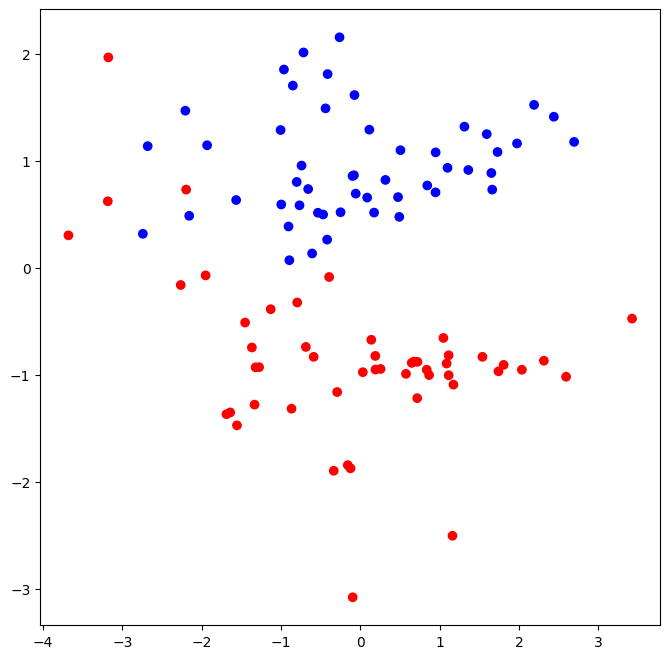

In [84]:
# сгенерируем случайные данные данные
classes = datasets.make_classification(n_samples=100, n_features=2, class_sep=0.9,n_informative=2, n_redundant=0, n_classes=2, random_state=25)

colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes
[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.show()

In [97]:
np.random.seed(25)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test, y_train, y_test = \
    X_shuffled[:train_test_cut], \
    X_shuffled[train_test_cut:], \
    y_shuffled[:train_test_cut], \
    y_shuffled[train_test_cut:]

X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])


In [116]:
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1200
eta = 0.05

w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

y_predicted_test = predict(w, X_test_tr)
y_predicted_train = predict(w, X_train_tr)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[0.35804509]
 [4.0089736 ]]
Точность на обучающей выборке: 97.143
Точность на тестовой выборке: 93.333


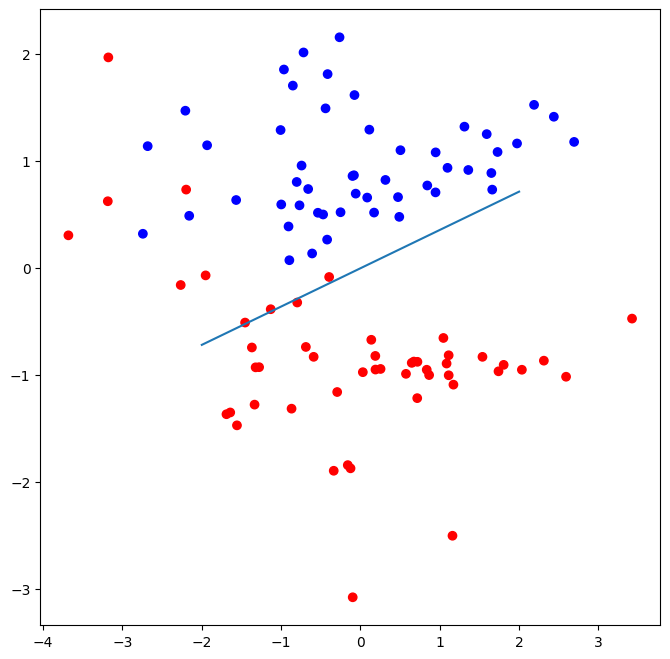

In [117]:
data = np.linspace(-2, 2, 200)

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, w[0,0]*data)

plt.show()

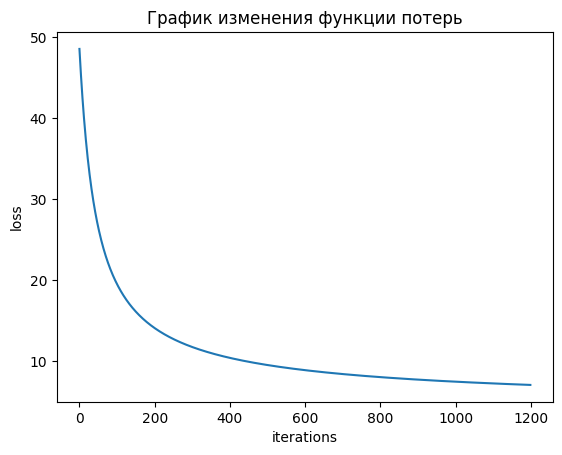

In [118]:
plt.title('График изменения функции потерь')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

plt.show()

# Дополнительные вопросы:

## Как влияет размер шага eta на сходимость алгоритма?

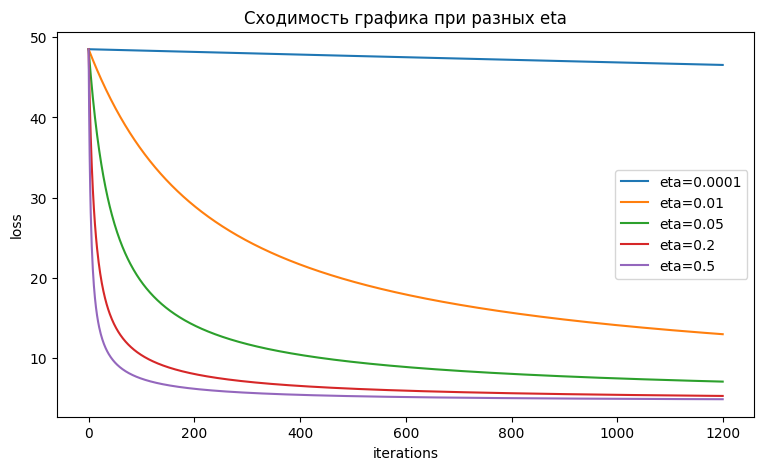

In [121]:
# возьму случайный набор eta
etas = [0.0001, 0.01, 0.05, 0.2, 0.5]
n_iterations = 1200
plt.figure(figsize=(9, 5))

for eta in etas:
    w0 = np.zeros((X_train_tr.shape[0], 1))
    w_tmp, losses_tmp = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)
    plt.plot(losses_tmp, label=f"eta={eta}")

plt.title("Сходимость графика при разных eta")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

eta - размер шага в градиентном спуске

При слишком маленьком eta медленная сходимость



## Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций n_iterations?

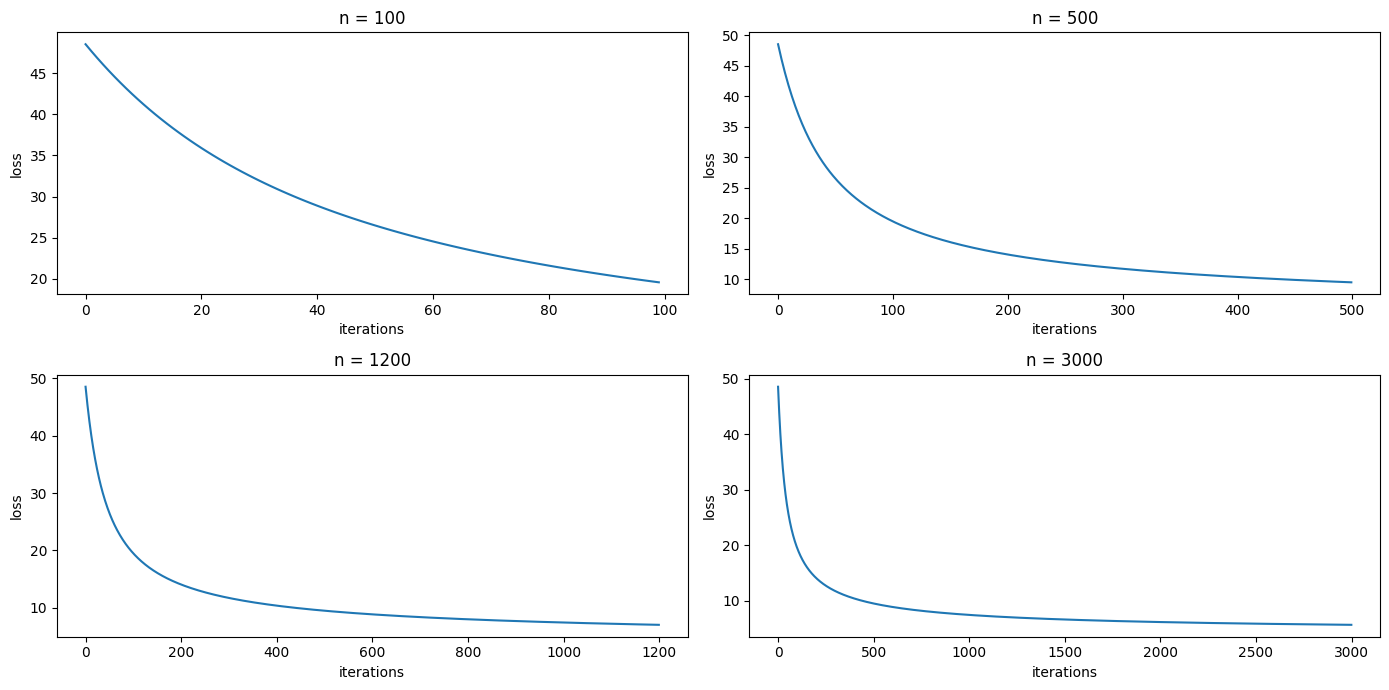

In [130]:
n_list = [100, 500, 1200, 3000]
eta = 0.05

fig, axes = plt.subplots(2, 2, figsize=(14, 7))
axes = axes.ravel()

for i, n in enumerate(n_list):
    w0 = np.zeros((X_train_tr.shape[0], 1))
    w, losses = optimize(w0, X_train_tr, y_train_tr, n, eta)

    axes[i].plot(range(len(losses)), losses)
    axes[i].set_title(f"n = {n}")
    axes[i].set_xlabel("iterations")
    axes[i].set_ylabel("loss")


plt.tight_layout()
plt.show()

При малом n_iterations градиентный спуск останавливается слишком рано - функция потерь ещё убывает, поэтому модель недообучена.

При большом n_iterations: дальнейшие итерации дают минимальный прирост, но увеличивают время обучения.

## Почему логистическая регрессия подходит для задач только бинарной классификации?

Логистическая регрессия дает вероятность от 0 до 1 (через сигмоиду), отвечая на вопрос будет ли объект принадлежать к классу или нет. Поэтому она подходит для бинарной классификации (0/1).